In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,mean_squared_error,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [2]:
dataset = pd.read_csv("C://Users//shaya//Desktop//Kaggle datasets//churn-modelling//Churn_Modelling.csv",engine='python')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### We scale the 'CreditScore','Age','Balance','NumOfProducts','EstimatedSalary' columns

In [4]:
dataset[['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']] = StandardScaler().fit(dataset[['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']].to_numpy()).transform(dataset[['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']].to_numpy())
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,-0.326221,France,Female,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1
1,2,15647311,Hill,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0
2,3,15619304,Onio,-1.536794,France,Female,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1
3,4,15701354,Boni,0.501521,France,Female,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0
4,5,15737888,Mitchell,2.063884,Spain,Female,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0


#### Separating the data into Training set (X) and Target (y)

In [5]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

#### It is seen that we have 10000 rows of data

In [6]:
X.shape

(10000, 10)

#### Since Geography and Gender columns have categorical data, we apply Label Encoder to them as machine learning algorithm takes data in numbers.

In [7]:
X.iloc[:,1] = LabelEncoder().fit_transform(X.iloc[:,1])
X.iloc[:,2] = LabelEncoder().fit_transform(X.iloc[:,2])

#### Here is how data looks like now

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886
1,-0.440036,2,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534
2,-1.536794,0,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687
3,0.501521,0,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918
4,2.063884,2,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276


#### We divide the data into training and test set

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#### We create Gradient Boosted Tree using XGBoost

In [10]:
xgb_model = XGBClassifier(learning_rate=0.1,base_score=0.8,max_depth=3,n_estimators=400,gamma=0.001)
xgb_model.fit(x_train,y_train,eval_metric=["auc","error"],verbose=True)


XGBClassifier(base_score=0.8, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.001,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

#### Here we get predictions from our model

In [11]:
predictions = xgb_model.predict(x_test)

#### We can see mean squared error of our predictions

In [12]:
mean_squared_error(y_test,predictions)

0.129

#### We can create and watch confusion matrix of model predictions

In [13]:
cm = confusion_matrix(y_test,predictions)

In [14]:
cm

array([[1544,   65],
       [ 193,  198]], dtype=int64)

#### We can check accuracy score of predictions. For me it was 87.1%

In [15]:
accuracy_score(y_test,predictions)

0.871

#### Here we check how important is each feature for the model.

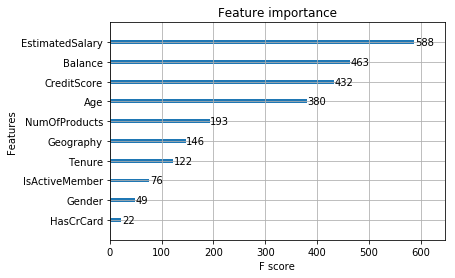

In [16]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

#### Here we can see the precision, recall and F1-score of our model

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1609
           1       0.75      0.51      0.61       391

   micro avg       0.87      0.87      0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

